In [1]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


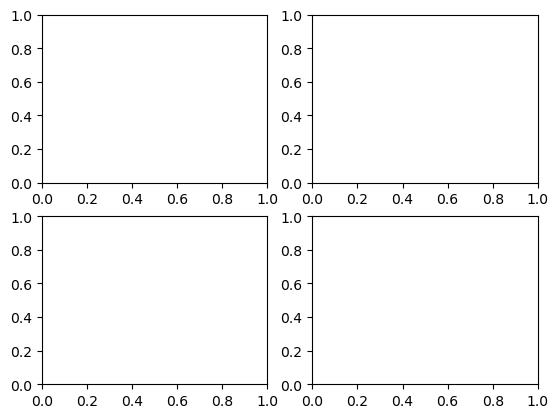

In [ ]:
#Create a blank 2 x 2 subplot (first argument is number of rows, second is number of columns)

fig, ax = plt.subplots(2, 2)

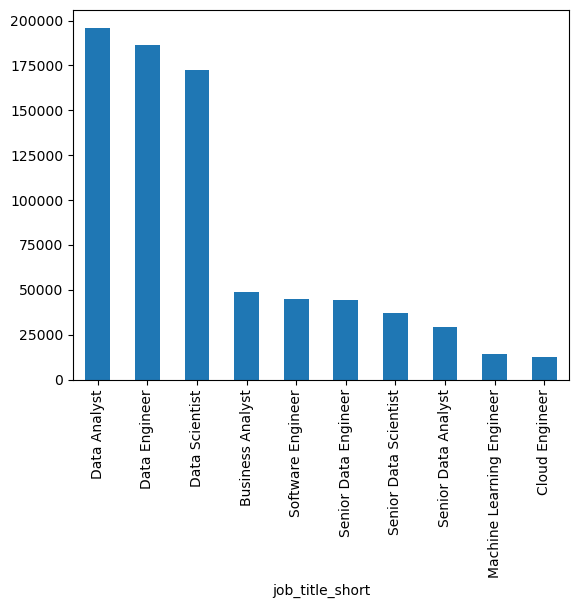

In [4]:
#Basic 1x1 figure using subplots

fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind = 'bar', ax = ax)
plt.show()

In [5]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

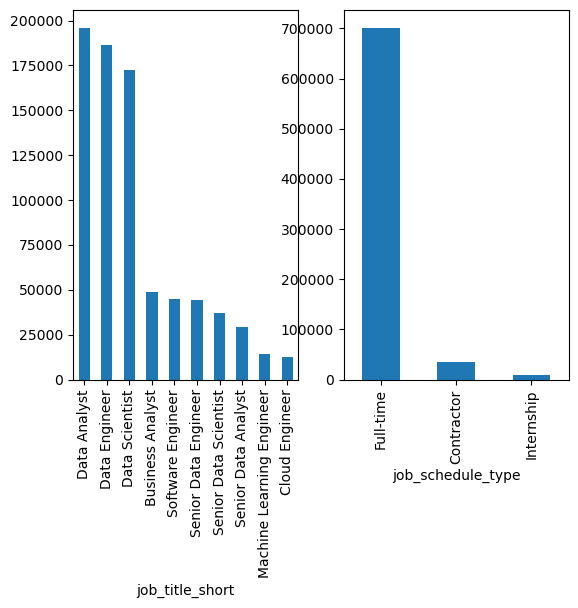

In [6]:
#Create a subplot containing two figures

fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind = 'bar', ax = ax[0])              #ax[0] specifies the first item of ax
df['job_schedule_type'].value_counts().head(3).plot(kind = 'bar', ax = ax[1])    #ax[1] specifies the second item of ax
plt.show()

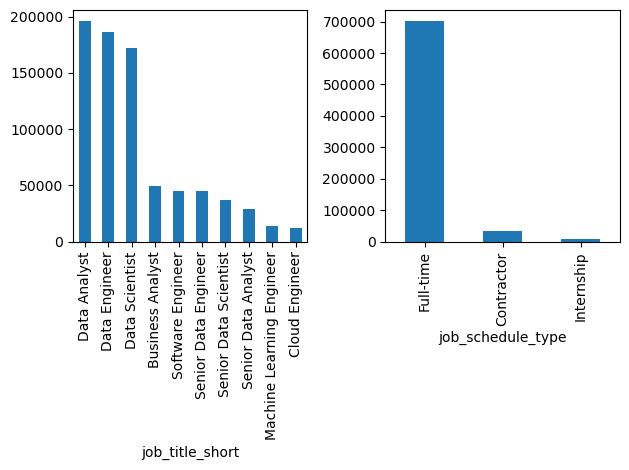

In [9]:
#Use .tight_layout to fix the formatting of the overall figure (fig)

fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind = 'bar', ax = ax[0])              #ax[0] specifies the first item of ax
df['job_schedule_type'].value_counts().head(3).plot(kind = 'bar', ax = ax[1])    #ax[1] specifies the second item of ax

fig.tight_layout()

plt.show()

In [11]:
#Recreate dataframe from Explode exercise (12) for job skills

df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by = 'skill_count', ascending = False, inplace = True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


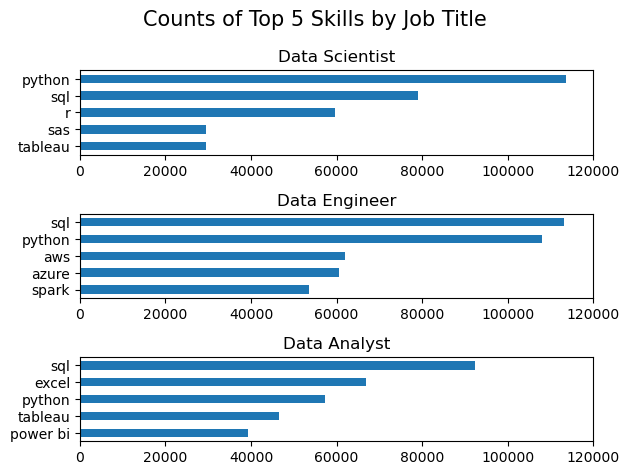

In [18]:
#Create subplots of skills for three job titles

job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):                                                             #Loop through each title in the job_titles list
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)                 #Filter for the 5 most frequent skills for the job title
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)    #Creates the plot with ax[i] specifying the index of the job_titles list
    ax[i].invert_yaxis()                                                                               #Inverts the y-axis to display the skill counts in descending order
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)                                                                          #Sets the min and max values for the axis

fig.suptitle('Counts of Top 5 Skills by Job Title', fontsize = 15)
fig.tight_layout()